In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
occ = pd.read_csv('noc_regions.csv')

In [6]:
dfocc = df.merge(occ)

In [7]:
dfocc.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [8]:
dfocc.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [9]:
dfocc.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
dfocc.groupby('Year').mean()

,ID,Age,Height,Weight
Year,,,,
1896,71099.757895,23.580645,172.739130,71.387755
1900,63681.200930,29.034031,176.637931,74.556962
1904,70258.328978,26.698150,175.788732,72.197279
1906,70696.454703,27.125253,178.206226,75.917073
1908,66412.000967,26.970228,177.543158,75.386128
1912,67462.126733,27.538620,177.447989,73.117450
1920,66991.033085,29.290978,175.752282,73.106157
1924,67535.149833,28.373325,174.963039,71.678261
1928,69139.836024,29.112557,175.162051,70.987465


In [11]:
dfocc.groupby(['Sex', 'Year']).mean()

ID        Age      Height     Weight
Sex Year                                                
F   1900  52845.818182  29.791667         NaN        NaN
    1904  92111.000000  50.230769         NaN        NaN
    1906  80266.909091  23.500000         NaN        NaN
    1908  69964.851064  33.897436         NaN        NaN
    1912  56715.712644  22.379310         NaN        NaN
    1920  61678.746269  24.409836  161.809524  58.000000
    1924  66839.245211  26.359223  162.382353  58.142857
    1928  71563.267735  23.712737  167.575000  59.017857
    1932  66160.024390  29.222552  167.153153  58.771930
    1936  66637.284153  23.184061  167.205607  58.988636
    1948  68452.734560  25.494253  168.472222  59.981752
    1952  71472.397619  22.880024  164.357647  58.148681
    1956  68658.712148  22.463504  163.962335  58.457306
    1960  70424.327746  21.893852  163.114905  57.515831
    1964  68600.951484  21.943493  164.144330  58.161290
    1968  67223.322845  20.813784  164.935113  57.654219
    1972  68264.313628  20.749712  165.112737  56.814755
    1976  68817.372361  20.793541  166.869811  58.160171
    1980  68043.950595  21.122053  166.675975  58.308909
    1984  69010.959102  21.959300  167.142020  58.045895
    1988  69083.043581  22.406591  167.608229  58.725037
    1992  70629.628389  22.961799  168.302134  59.504532
    1994  72510.367421  23.465158  167.037109  59.313294
    1996  70416.982593  23.660128  168.347928  59.383436
    1998  74100.715318  24.353324  166.605322  59.841852
    2000  70019.466962  24.488647  168.980279  60.815501
    2002  73740.262958  25.128951  166.646006  60.200835
    2004  70940.246791  24.782499  168.985510  61.214376
    2006  71573.132043  25.190666  166.838930  60.339133
    2008  70033.601933  24.889138  169.510786  61.686114
...                ...        ...         ...        ...
M   1912  67698.640273  27.656834  177.447989  73.117450
    1920  67162.232323  29.470075  176.144772  73.138298
    1924  67568.587077  28.468815  175.418085  71.816984
    1928  68933.676854  29.582273  175.840223  72.000000
    1932  66100.931911  33.008666  174.931942  71.905680
    1936  68871.727671  27.874193  176.564055  72.730812
    1948  66344.281780  29.192795  177.254634  73.185897
    1952  67588.409855  26.890234  176.496880  72.855405
    1956  68607.257720  26.726921  176.360205  73.313402
    1960  66157.073467  25.934386  175.403202  71.988149
    1964  68241.660844  25.629692  175.594406  72.371932
    1968  67377.639855  25.167932  176.355959  72.791395
    1972  67796.735067  25.313838  177.191317  73.642440
    1976  67343.688205  24.852390  177.722588  74.274092
    1980  67770.517257  24.539548  178.458705  74.771592
    1984  66730.817716  24.592844  178.550464  74.592776
    1988  67036.009015  24.768046  179.101999  75.335735
    1992  67139.163129  24.954094  179.753352  76.336263
    1994  68959.482238  24.937165  179.442791  77.232033
    1996  67376.719104  25.649582  180.137211  77.264233
    1998  68084.875281  25.668319  179.559041  77.853619
    2000  68205.595943  26.037828  180.710241  77.806319
    2002  67926.848437  26.409181  179.715706  78.024741
    2004  67827.831052  26.243093  180.894837  78.373362
    2006  68156.080762  26.473524  179.845361  77.349024
    2008  68082.867876  26.376946  181.257728  78.672611
    2010  70421.486106  26.719765  180.432824  77.963007
    2012  67338.674327  26.621740  181.638654  78.945938
    2014  69119.483264  26.447699  180.261738  77.901562
    2016  66718.865423  26.743325  181.555828  78.567331

[69 rows x 4 columns]

In [12]:
dfocc.groupby(['Sex', 'Year']).max()

Age                    City  \
Sex Year                                 
F   1900  46.0                   Paris   
    1904  63.0               St. Louis   
    1906  26.0                  Athina   
    1908  54.0                  London   
    1912  45.0               Stockholm   
    1920  42.0               Antwerpen   
    1924  74.0                   Paris   
    1928  67.0            Sankt Moritz   
    1932  69.0             Los Angeles   
    1936  73.0  Garmisch-Partenkirchen   
    1948  72.0            Sankt Moritz   
    1952  45.0                    Oslo   
    1956  61.0               Stockholm   
    1960  65.0            Squaw Valley   
    1964  43.0                   Tokyo   
    1968  66.0             Mexico City   
    1972  69.0                 Sapporo   
    1976  48.0                Montreal   
    1980  49.0                  Moskva   
    1984  52.0                Sarajevo   
    1988  63.0                   Seoul   
    1992  53.0               Barcelona   
    1994  40.0             Lillehammer   
    1996  58.0                 Atlanta   
    1998  44.0                  Nagano   
    2000  53.0                  Sydney   
    2002  48.0          Salt Lake City   
    2004  56.0                  Athina   
    2006  44.0                  Torino   
    2008  58.0                 Beijing   
...        ...                     ...   
M   1912  67.0               Stockholm   
    1920  72.0               Antwerpen   
    1924  81.0                   Paris   
    1928  97.0            Sankt Moritz   
    1932  96.0             Los Angeles   
    1936  74.0  Garmisch-Partenkirchen   
    1948  84.0            Sankt Moritz   
    1952  65.0                    Oslo   
    1956  67.0               Stockholm   
    1960  64.0            Squaw Valley   
    1964  60.0                   Tokyo   
    1968  68.0             Mexico City   
    1972  66.0                 Sapporo   
    1976  70.0                Montreal   
    1980  70.0                  Moskva   
    1984  60.0                Sarajevo   
    1988  70.0                   Seoul   
    1992  62.0               Barcelona   
    1994  46.0             Lillehammer   
    1996  63.0                 Atlanta   
    1998  50.0                  Nagano   
    2000  63.0                  Sydney   
    2002  48.0          Salt Lake City   
    2004  57.0                  Athina   
    2006  52.0                  Torino   
    2008  67.0                 Beijing   
    2010  51.0               Vancouver   
    2012  71.0                  London   
    2014  55.0                   Sochi   
    2016  60.0          Rio de Janeiro   

                                                Event        Games  Height  \
Sex Year                                                                     
F   1900                       Tennis Women's Singles  1900 Summer     NaN   
    1904                   Archery Women's Team Round  1904 Summer     NaN   
    1906                       Tennis Women's Singles  1906 Summer     NaN   
    1908       Tennis Women's Singles, Covered Courts  1908 Summer     NaN   
    1912       Tennis Women's Singles, Covered Courts  1912 Summer     NaN   
    1920                       Tennis Women's Singles  1920 Summer   175.0   
    1924                       Tennis Women's Singles  1924 Winter   175.0   
    1928        Swimming Women's 400 metres Freestyle  1928 Winter   183.0   
    1932        Swimming Women's 400 metres Freestyle  1932 Winter   183.0   
    1936        Swimming Women's 400 metres Freestyle  1936 Winter   183.0   
    1948        Swimming Women's 400 metres Freestyle  1948 Winter   180.0   
    1952        Swimming Women's 400 metres Freestyle  1952 Winter   188.0   
    1956        Swimming Women's 400 metres Freestyle  1956 Winter   185.0   
    1960        Swimming Women's 400 metres Freestyle  1960 Winter   186.0   
    1964                Volleyball Women's Volleyball  1964 Winter   188.0   
    1968                Volleyball Wom

In [13]:
dfocc.groupby(['Sex', 'Year']).min()

Age               City  \
Sex Year                            
F   1900  13.0              Paris   
    1904  24.0          St. Louis   
    1906  21.0             Athina   
    1908  21.0             London   
    1912  13.0          Stockholm   
    1920  13.0          Antwerpen   
    1924  11.0           Chamonix   
    1928  11.0          Amsterdam   
    1932  11.0        Lake Placid   
    1936  11.0             Berlin   
    1948  12.0             London   
    1952  13.0           Helsinki   
    1956  12.0  Cortina d'Ampezzo   
    1960  11.0               Roma   
    1964  12.0          Innsbruck   
    1968  11.0           Grenoble   
    1972  13.0             Munich   
    1976  12.0          Innsbruck   
    1980  13.0        Lake Placid   
    1984  13.0        Los Angeles   
    1988  11.0            Calgary   
    1992  12.0        Albertville   
    1994  13.0        Lillehammer   
    1996  12.0            Atlanta   
    1998  15.0             Nagano   
    2000  13.0             Sydney   
    2002  15.0     Salt Lake City   
    2004  13.0             Athina   
    2006  14.0             Torino   
    2008  12.0            Beijing   
...        ...                ...   
M   1912  15.0          Stockholm   
    1920  13.0          Antwerpen   
    1924  14.0           Chamonix   
    1928  13.0          Amsterdam   
    1932  13.0        Lake Placid   
    1936  12.0             Berlin   
    1948  13.0             London   
    1952  12.0           Helsinki   
    1956  13.0  Cortina d'Ampezzo   
    1960  13.0               Roma   
    1964  13.0          Innsbruck   
    1968  12.0           Grenoble   
    1972  12.0             Munich   
    1976  14.0          Innsbruck   
    1980  13.0        Lake Placid   
    1984  12.0        Los Angeles   
    1988  12.0            Calgary   
    1992  11.0        Albertville   
    1994  15.0        Lillehammer   
    1996  14.0            Atlanta   
    1998  14.0             Nagano   
    2000  14.0             Sydney   
    2002  15.0     Salt Lake City   
    2004  14.0             Athina   
    2006  15.0             Torino   
    2008  13.0            Beijing   
    2010  15.0          Vancouver   
    2012  15.0             London   
    2014  15.0              Sochi   
    2016  14.0     Rio de Janeiro   

                                                      Event        Games  \
Sex Year                                                                   
F   1900                    Croquet Mixed Singles, One Ball  1900 Summer   
    1904              Archery Women's Double Columbia Round  1904 Summer   
    1906                               Tennis Mixed Doubles  1906 Summer   
    1908              Archery Women's Double National Round  1908 Summer   
    1912                          Diving Women's Plain High  1912 Summer   
    1920                    Art Competitions Mixed Painting  1920 Summer   
    1924                Art Competitions Mixed Architecture  1924 Summer   
    1928      Art Competitions Mixed Literature, Epic Works  1928 Summer   
    1932                       Art Competitions Mixed Music  1932 Summer   
    1936                     Alpine Skiing Women's Combined  1936 Summer   
    1948                     Alpine Skiing Women's Combined  1948 Summer   
    1952                     Alpine Skiing Women's Downhill  1952 Summer   
    1956                     Alpine Skiing Women's Downhill  1956 Summer   
    1960                     Alpine Skiing Women's Downhill  1960 Summer   
    1964                     Alpine Skiing Women's Downhill  1964 Summer   
    1968                     Alpine Skiing Women's Downhill  1968 Summer   
    1972                     Alpine Skiing Women's Downhill  1972 Summer   
    1976                     Alpine Skiing Women's Downhill  1976 Summer   
    1980                     Alpine Skiing Women's Downhill  1980 Summer   
    1984                     Alpine Skiing Women's Downhill  1984 Summer   
    198

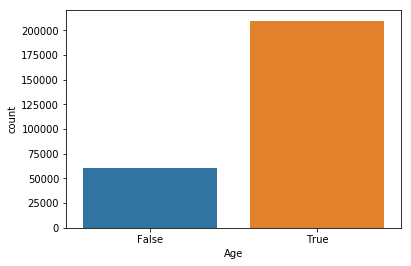

In [20]:
sns.countplot(dfocc.Age<30)

In [36]:
dfocc['Sex'].count()

270767

In [58]:
Regions = str('region')

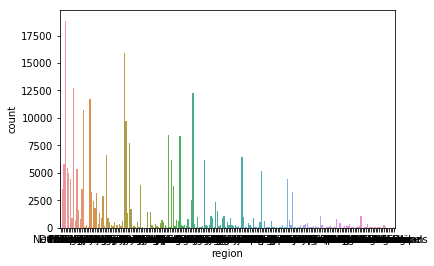

In [59]:
sns.countplot(dfocc.region)

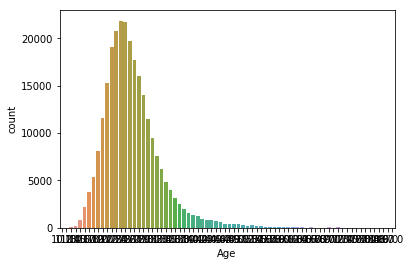

In [65]:
sns.countplot(dfocc.Age)

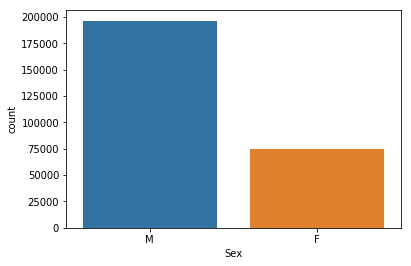

In [66]:
sns.countplot(dfocc.Sex)